<a href="https://colab.research.google.com/github/hmblackwood/Heart_Disease_Project/blob/main/Heart_Disease_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🫀 The Heart Disease Project 🫀

# Summary:
- I created three machine learning models that determine whether someone has heart disease based on their other medical factors.
- Python libraries used: NumPy, Pandas, Matplotlib, Seaborn, Scikit-Learn


##1. Problem
Given clinical parameters about a patient, can I predict whether or not they have heart disease?


##2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease


##3. Machine Learning Model
- Models used:
  - Logistic regression
  - K Nearest Neighbors
  - Random Forest Classifier


##4. Evaluation
If I can reach 95% accuracy at predicting whether or not a patient has heart disease, I will consider that a success.
I will evaluate the model using:
- ROC curve and AUC score
- Confusion matrix
- Classification report that will include:
  - Precision
  - Recall
  - F1-score

## 5. Feature Importance
Which features of the data contributed most to the outcomes of the model?

# Data Dictionary
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)s, 0=no) (= the predicted attribute)et

# Preparing the Tools

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plots will appear inside notebook
%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Exploratory Data Analysis
My goal is to discover more about the data.
- What question am I trying to solve?
I want to know if I can predict heart disease based on other medical factors. If so, which ones?
- What kind of data do I have and how do I treat different types of data (integers, strings, floats)
- What is mising from the data and how will I deal with missing values?
- What are the outliers and how should they be handled?
- Can I add, change or remove features to get more out of the data?

## Load the Data

In [ ]:
# Load the data into a Pandas dataframe so I can visualize and work with it.
# It has 303 rows and 14 columns.
df = pd.read_csv("/content/drive/MyDrive/Heart Disease Project/heart-disease.csv")
df.shape

(303, 14)

In [ ]:
# Take a look at the data frame
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# How many of each class are there?
df.target.value_counts()

,count
target,
1,165
0,138


The target column states whether the patient has heart disease or not. There are 165 cases where the answer is yes to heart disease and 138 where the patient does not have heart disease.

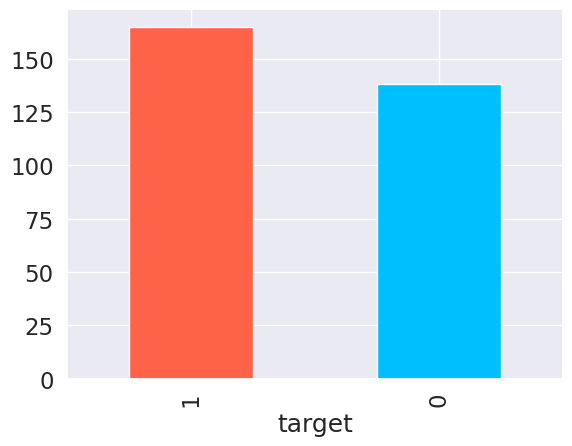

In [ ]:
# Plot this information as a bar graph for visualization
df["target"].value_counts().plot(kind="bar", color=["tomato", "deepskyblue"]);

In [ ]:
# Check for any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Count the number of missing values in each column of the DataFrame.
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


✅ There are zero missing values. In other situations, our data may  not be so clean. In that case, we would have to make choices about how to handle missing data. Some options are:
- Dropping rows or columns with missing values.
- Imputing missing values with statistical measures like the mean or median of the other values in that row or column.
- More advanced methods like KNN (K Nearest Neighbor) where I fill in the missing values by finding "k" nearest neighbors to the missing data point, then using the average of the neighboring values to estimate the missing value.


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency by Sex

In [ ]:
# See how many males (1) vs females (0) are in this data set.
df.sex.value_counts()

,count
sex,
1,207
0,96


There were 207 males and 96 females. The data is heavily skewed toward males.

In [ ]:
# Comare the target (Heart Disease yes/no) column with the sex column.
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Inferences based on this data:
- If someone is female, there is a roughly 75% chance she has heart disease.
72 our of 96 women had heart disease. 72 is from the preceeding cell. 96 is from the count of males/females in the cell above. 24 women did not have heart disease.
- For men, 93 out of 207 have heart disease. That's a 44.9% chance of having heart disease.
❗Note that these are inferences based on the data, not on common sense.

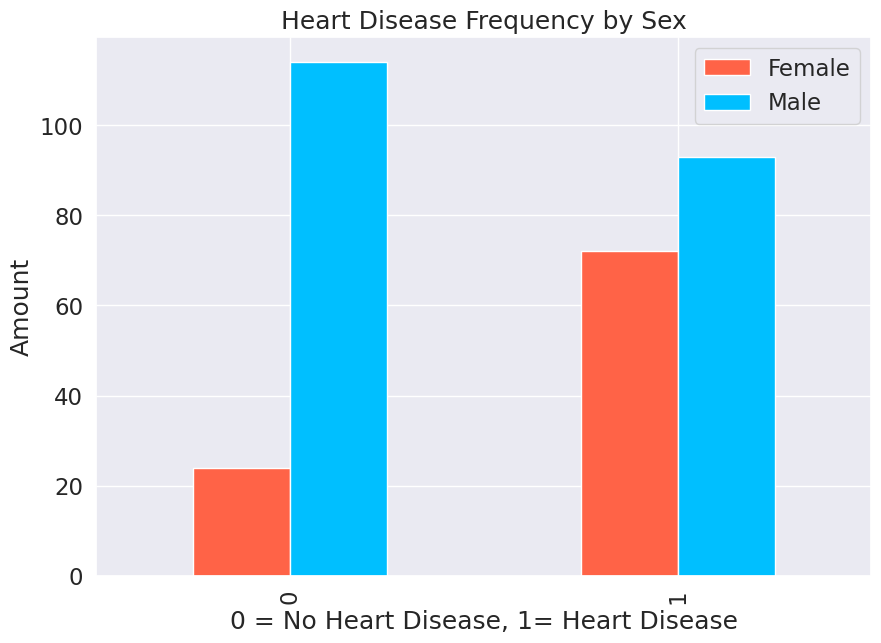

In [ ]:
# Create a plot of the cross tab data from above.

# Create a plot of the crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 7),
                                    color=["tomato", "deepskyblue"])

plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0 = No Heart Disease, 1= Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);


## Age vs. Max Heart Rate for Heart Disease

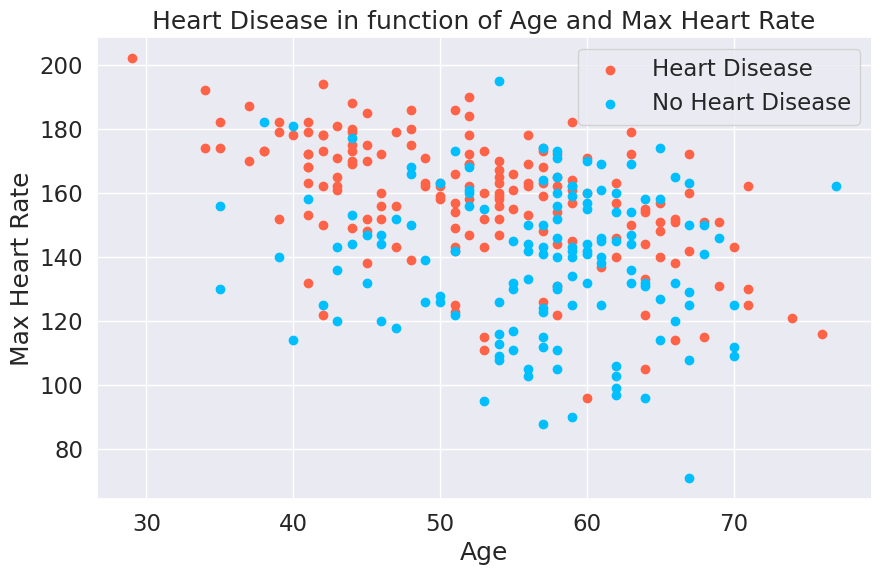

In [ ]:
# Create another figure comparing other variables, max heart reate and heart disease.
plt.figure(figsize=(10, 6))

# Scatter plot with positive examples. Target value is only the people with heart disease (value 1)
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c = "tomato")

# Scatter plot with negative examples. Target value is only the people with without heart disease (value 0)
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="deepskyblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease", "No Heart Disease"]);


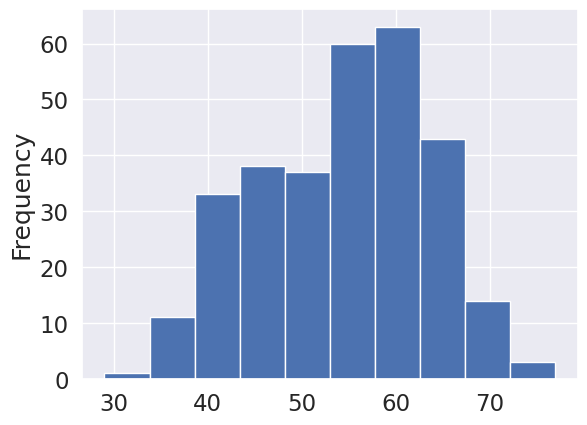

In [ ]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

Most patients fall in the 55-65 age group.

## Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

We can see that as chest pain increases, so does the likelihood of heart disease.
One thing that stands out is the esophogal spasms (#2: Non-anginal pain). For this, we would need to check with a medical professional to see if that truly is correlated with heart disease.

In [ ]:
# Create a crosstab dataframe that shows the correlations between chest pain(cp), 1-3 above, and heart disease (1) or no heart disease (0)
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


This crosstab isn't very easy to understand. I will create a bar graph which will make the data more easy to visualise.

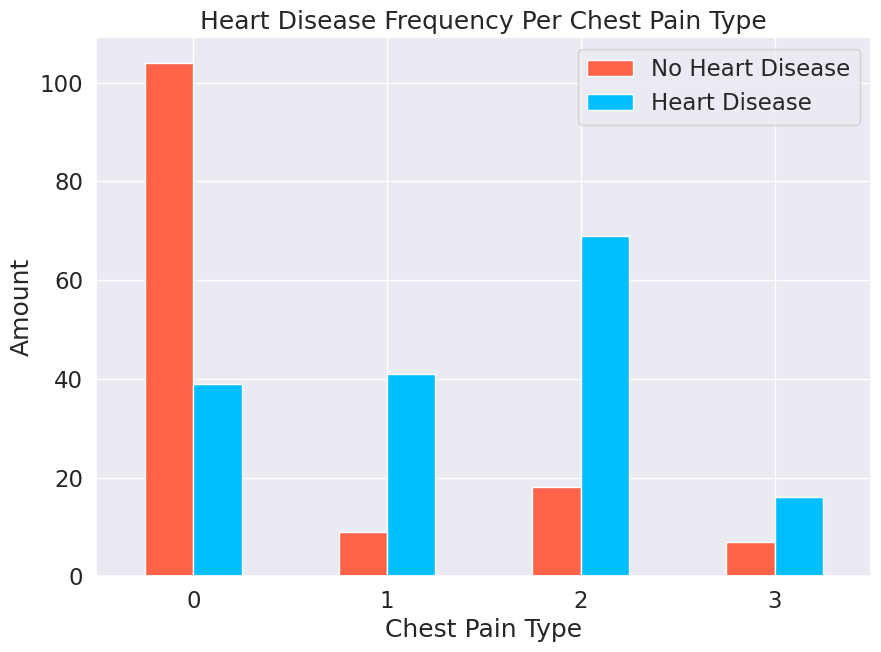

In [ ]:
# Make crosstab ore easy to visualize
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 7),
                                   color=["tomato", "deepskyblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Heart Disease", "Heart Disease"]);
plt.xticks(rotation=0);

I will now check the relationship between independant varaibles (all of the columns except for the target column/dependant variable). Is there a positive or negative correlation? Let's find out.

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Create a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

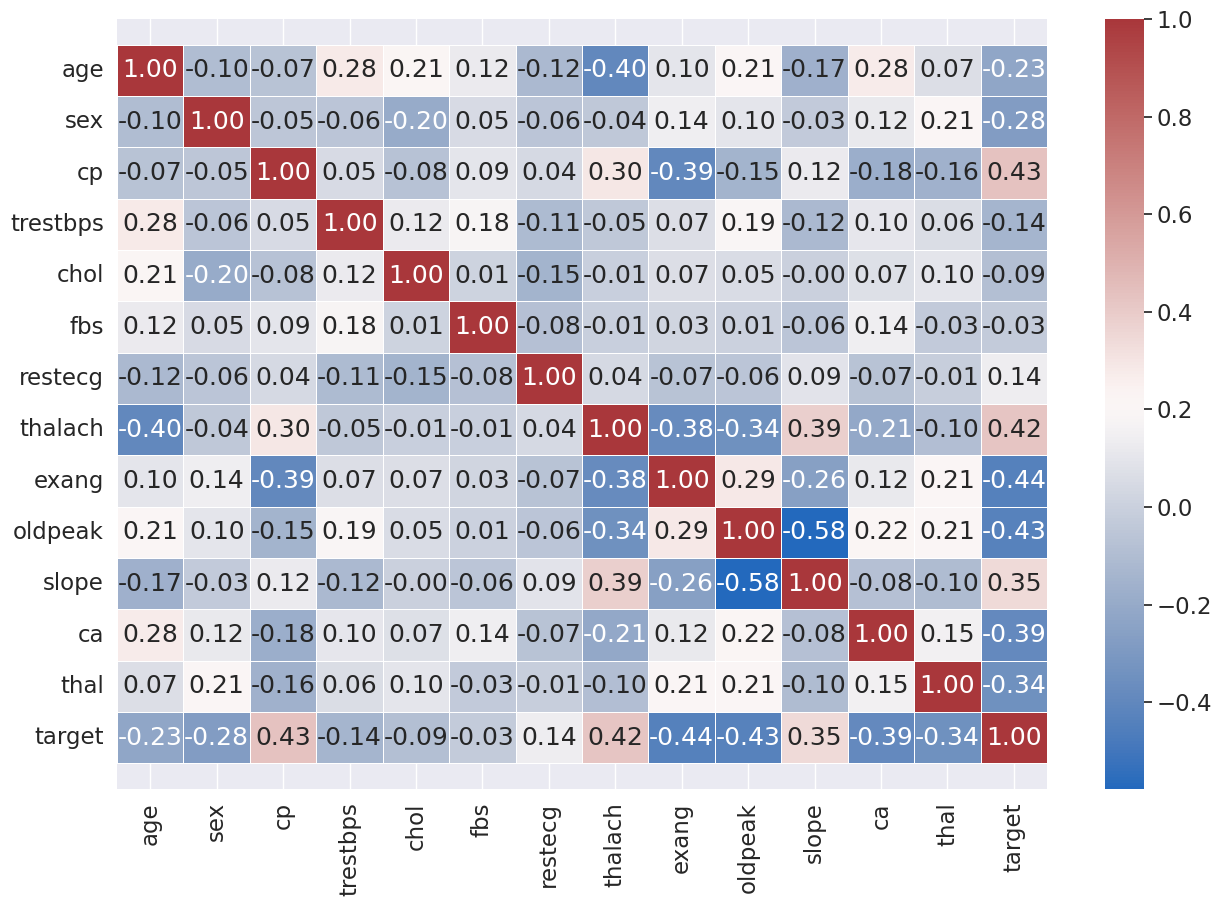

In [ ]:
# I'll use Seaborn's heatmap function to make the data more readable.

corr_matrix = df.corr()
fix, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True, # display correlation values
                 linewidths=0.5,
                 fmt=".2f", # This formats the correlation values to two decimal places
                 cmap="vlag");
bottom, top = ax.get_ylim() # Fixes issue with Seaborn heatmaps where top and bottom rows are cut off.
ax.set_ylim(bottom + 0.5, top - 0.5)

Heat Map Information:
- A higher positive value means a higher chance of a positive correlation.
- A higher negative value means a potential negative correlation.
    - Negative correlation = a relationship between two variables in which one variable increases as the other decreases.

Inferences made from the heat map:
- In the above data, according to correlation value, if someone has chest pain during exercise (exang = 1), their chance of heaving heart disease goes down (target = 0). The target/exang intersection point has a value of -0.44.
- OldPeak has a value of -.43, another high correlation. Accoring to the data dictionary: oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more.

#Modeling
Now I will do model-driven exploratory data analysis. I will build a machine learning model to derive insights on how independant variables (all columns except "target") contribute to the dependant variable (target column).


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Split the data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [ ]:
# Verify that "target" column has been removed.
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
# View y to see that it is a column of binary classification values of 1 and 0, heart disease and no heart disease.
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
# Split the data into training and test sets. 20% into the training set, 80% into the testing set.
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
# Verify that the data has been split into 80/20 parts.
len(X_train), len(X_test), len(y_train), len(y_test)

(242, 61, 242, 61)

## Creating the Models
I'll be trying three different machine learning models.
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

I am using these models after consulting the Scikit-learn documentation:
https://scikit-learn.org/1.3/tutorial/machine_learning_map/
and the updated version:
https://scikit-learn.org/stable/supervised_learning.html.

I have a binary classification problem to solve. The output will be one of two options: yes to heart disease or no heart disease.


Note: the Logistic Regression model is a classification model, not regrssion model. While technically considered a type of regression model, it is mostly used for classification tasks due to its output being a probability value between 0 and 1.


In [ ]:
# Put models in dictionary.
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and evaluates given machine learning models.
  models : a dict of different Scikit-learn machine learning models
  X_train: training data (no labels)
  X_test: testing data (no labels)
  y_train: training labels
  y_test: test labels
  """
  # Set random seed
  np.random.seed(42)
  # Make a dictionary to keep model scores
  model_scores = {}
  # Loop through models
  for name, model in models.items():
    # Fit the model to the data
    model.fit(X_train, y_train)
    # Evaluate the model and append its score to model_scores
    model_scores[name] = model.score(X_test, y_test)
  return model_scores


In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Model Comparison

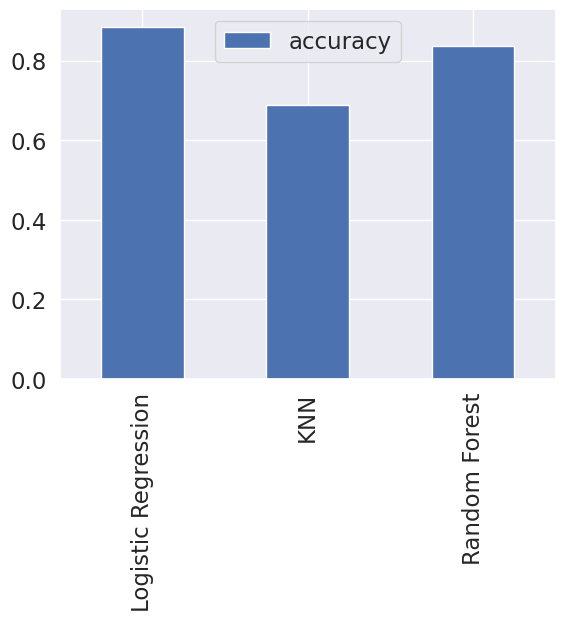

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(); # .T transposes rows and columns for easier readability.

✅ From initial analysis, it looks like the Logistic Regression model performs the best. Now I have a baseline for accuracy for these three models. Time for more experimentation!

### Next steps:
- Hyperparameter Tuning
- Feature importance
- Confusion matrix
- Cross validation
- Precision
- Recall
- F1 Score
- Classification report
- ROC curve
- Area under the curve (AUC)

# Hyperparameter Tuning (by hand)

## K- Nearest Neighbor Classifier Hypertuning

In [ ]:
# Tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Set up KNN instance
knn = KNeighborsClassifier()

# Loop through the different n_neighbors
# This is the only hyperparameter I am tuning.
for i in neighbors:
  knn.set_params(n_neighbors=i)
  # Fit the algorithm
  knn.fit(X_train, y_train)
  # Update the training scores list
  train_scores.append(knn.score(X_train, y_train))
  # Update the test scores list
  test_scores.append(knn.score(X_test, y_test))



In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Time to visualize the data so we can better understand it.

Maximum KNN score on the test data: 75.41%


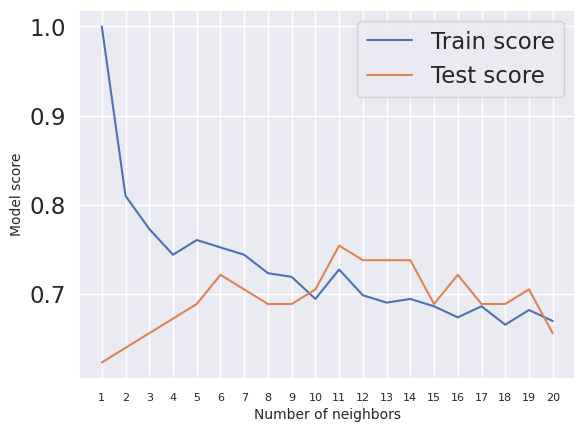

In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1), fontsize=8)
plt.xlabel("Number of neighbors", fontsize=10)
plt.ylabel("Model score", fontsize=10)
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%") # display the percentage to 2 decimal places

I can see that using 11 neighbors gives me the highest test score. The default is five.
For our tuned KNN model, it raises its maximum accuracy to 75.41%. But Random Forest (83%) and Logistic Regression (88.5%) both still outperform it.
Therefore the K-Nearest Neighbors Classifier model is out of the running for the best performing model.

## Hyperparameter Tuning with RandomizedSearchCV
I will be tuning Logistic Regression() and RandomForestClassifier() using RandomizedSearchCV (Cross Validation)

Note: RandomizedSearchCV is a machine learning technique used to optimize a model's hyperparameters by randomly sampling combinations of values from a defined search space, allowing for efficient exploration of a large parameter grid, particularly when dealing with many hyperparameters, instead of exhaustively testing every possible combination like GridSearchCV does. It randomly selects and evaluates different hyperparameter settings to find the best performing configuration

- Create a hyperparameter grid for Logistic Regression and Random Forest Classifier. This will allow me to find the ideal set of hyperparameters that yield the best model performance.

- Logistic Regression Grid
  - C represents the regularization strength. Prevents overfitting.
  - Logspace(-4, 4, 20) creates an array for 20 values for C, spaced evenly between 10^-4 and 10^4.
  - Solver key specifies the algorithm. Here it is set to "liblinear" which is good for small datasets like those within this notebook.

- Random Forest Classifier Grid
  - n_estimators: Key to determine the number of decision trees in the random forest. Generates a sequence of numbers 10-1000 with a step of 50.
  - max_deth: Key controlls max depth of each decision tree. None = no depth restriction, and specific depths of 3, 5, and 10.
  - min_samples_split: Key sets minimum number of samples required to split an internal node of a decision tree. Creates a sequence of even number 2-20 to allow model to experiment with different criteria.
  - min_samples_leaf: Key determines minimum number of samples required to be a leaf node (terminal node of the tree). Creates a sequence of odd numbers 1-20 to enable the model to try different leaf node sides.


In [ ]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now I have hyperparameter grids set up for each model. Now to tune them using RandomizedSearchCV

In [ ]:
# Tune Logistic Regression

np.random.seed(42)

# Set up random hyperparameter search for Logistic Regression
# Calls Randomized Search CV. Cross validates LR model 5 times, 20 iterations (total 100 tests)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,  #5 tests for cross validation
                                n_iter=20, #20 iterations
                                verbose=True)

# Fit random hyperparameter search odel for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
# Check for the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
# Evaluate on our test data
rs_log_reg.score(X_test, y_test)

0.8852459016393442

88.5% is our best result. This is equal to our original result out of the box for the Logistic Regression model. Hypertuning it did not improve it.

Now on to tune Random Forest Classifier()

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5, # 5 tests
                           n_iter=20,  #20 iterations
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
# rs_rf = random search random forest
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
rs_rf.score(X_test, y_test)

0.8688524590163934

Our result is 86.8% accuracy. Our original result for the untuned Random Forest Classifier model was 83.6%. That is a clear improvement!
However, Logistic Regression model got 88% without hypertuning. It is our best performing model.

## Hyperparameter Tuning with GridSearch CV

The top performing model, at 88% is the Logistic Regression model.

I'm going to set up a hyperparameter grid the same way I did for Random Forest and Logistic Regression above. But this time, I'll be changing the hyperparameter tuning to use GridSearch CV.

Note: A difference between RandomizedSearchCV and GridSearchCV is the param_grid. In GridSearchCV it's called param_grid. In RandomizedSearchCV it's called param_distributions. There's no "n_iter" parameter for GridSearchCV because GridSearchCV tries every single parameter and finds the best one.'

See section notes for Hyperparameter Tuning with RandomizedSearchCV for explanations on the code below.

In [ ]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

Our best parameter yielded 88.5% accuracy. It did not do any better than our 88.5% before.

❗Result: Our baseline, untuned Logistic Regression model is our highest performing model. ❗

# Evaluting our tuned machine learning classifier, beyond accuracy
- ROC curve and AUC score: ROC shows the model's performance plotting the True Positive Rate (TPR) against the False Positive Rate. AUC is a metric that measures how well a classifier can distinguish between positive and negative classes.
- Confusion matrix: Shows true positives, true negatives, false positives and false negatives.
- Classification report which will inclue the items below:
  - Precision: Proportion of positive identification which are actually correct.
  - Recall: Proportion of actual positives which were correctly classified.
  - F1-score: Combination of precision and recall.  It is a measure of the harmonic mean of precision and recall.

In [ ]:
# First, make predictions with the tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


## ROC Curve and AUC Score

An ROC curve plots the results of a binary classification model. It shows the model's performance plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various points.
Our result below is a good example of a positive result.

Our AUC score is .92. AUC is a metric that measures how well a classifier can distinguish between positive and negative classes

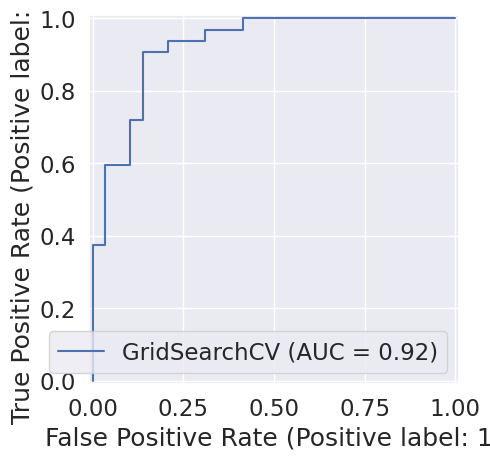

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

## Confusion Matrix

Our confusion matrix shows true positives, true negatives vs false positives and false negatives. In our case, our model shows a strong ability to predict true positives and true negatives.

In [ ]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


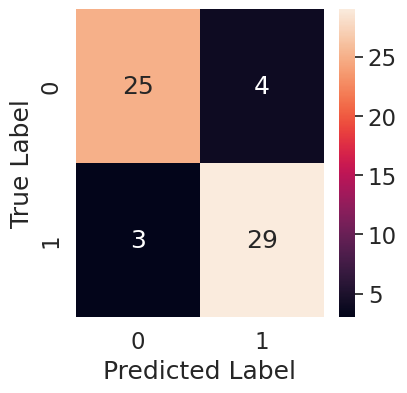

In [ ]:
sns.set(font_scale=1.5) #Increase font size for readability

def plot_conf_mat(y_test, y_preds):
  """
  Plots a confusion matrix using Seaborn's heatmap().
  """
  fig, ax = plt.subplots(figsize=(4, 4))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True, #Annotate the boxes
                   cbar=True)
  plt.xlabel("Predicted Label") # Predictions on X axis
  plt.ylabel("True Label") # True labels on Y axis

plot_conf_mat(y_test, y_preds)


## Classification Report

The classification report tells us overall how often our model is correct.
- Precision: Proportion of positive identification which are actually correct.
- Recall: Proportion of actual positives which were correctly classified.
- F1-score: Combination of precision and recall.  It is a measure of the harmonic mean of precision and recall.
- Support: The total number of data points belonging to each class in the dataset

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Evaluation Metrics Using Cross-Validation

In our classification report above, our data was only calculated on one 80/20 train/test split. I am going to use 5-fold cross-validation to split the data 5 times in 5 different ways. It's the same training and testing data, but I split it different ways.
We'll see if this increases our model performance.

In [ ]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# Create a new classifier with these best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [ ]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

We just evaluated the data on 5 different splits and got 5 different results. Let's calculate the mean of these results to see overall accuracy.

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [ ]:
# Cross validated precision mean
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                            scoring="precision")
cv_precision = np.mean(cv_acc)
cv_precision

0.8446994535519124

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                            scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [ ]:
# Cross-validated F1 score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

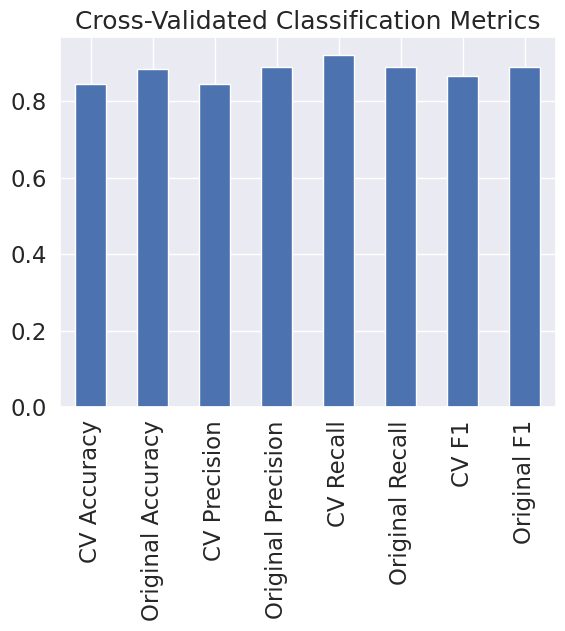

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"CV Accuracy": cv_acc,
                           "Original Accuracy": .885,
                           "CV Precision": cv_precision,
                           "Original Precision": .89,
                           "CV Recall": cv_recall,
                           "Original Recall": .89,
                           "CV F1": cv_f1,
                           "Original F1": .89
                           },
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrics",
                      legend=False);

The only are where the cross validated data outperformed the original is in recall. Our original model, not tuned and not cross-validated appears to be our best model.

# Feature Importance

Feature importance determines which features contributed most to the outcomes of the model and how they contributed.

In [ ]:
# See what our best parameters were.
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# Create a new classifier with these best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
clf.fit(X_train, y_train);

In [ ]:
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

Note: clf.coef_ extracts the feature coefficients from the trained Logistic Regression model (clf). These coefficients quantify the impact of each feature on predicting heart disease and are essential for understanding the model's decision-making process and identifying important features.

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


I need to make the above data make sense. I will match the coefs of features to columns and create a dictionary. Zip together the df columns and the list of clf.coef.

In [ ]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

Now they are zipped together. Each coefficient variable is now paired with one of our independant variables (age, sex, etc.). How much and in what way do each of them contribute to predicting the target variable?
Note: The numbers above match up to the heat map/correlation matrix we did above.

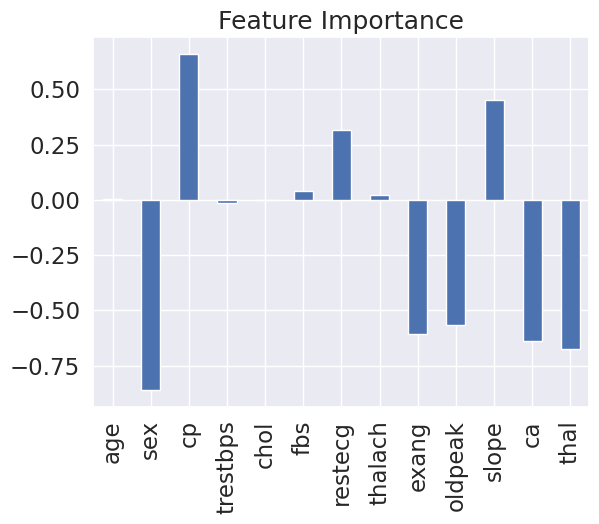

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

The graph shows how much each feature contributes to the target variable. Some are negative and some are positive.
- Chest Pain type (CP) is highly correlated with heart disease, with more pain meaning a higher likelihood of heart disease.
- For sex, we see a negative correlation. When the value for sex increases, the target value decreases. This simply means that when the value for female (0) switches to male (1), we see heart disease rate decrease. This correlates with what we saw earlier where the women in this dataset are more likely to have heart disease. It does not match up with common sense, and an actual medical professional is needed here.
- For slope, we see a positive relationship. A higher slope equals a higher likelihood of heart disease. The lower slope means a less healthy heart and a higher chance of heart disease.
  - From the data dictionary:
      * 0: Upsloping: better heart rate with excercise (uncommon)
      * 1: Flatsloping: minimal change (typical healthy heart)
      * 2: Downsloping: signs of unhealthy heart

#🫀 Results 🫀

- The top performing model, at 88% accuracy, is the Logistic Regression model without any hyperparameter tuning. I had set my goal at 95% accuracy, and though I did not reach that goal, my model performs reasonably well.
- The areas most highly correlated with heart disease are chest pain type (CP) and slope.
- As with all health-related data analysis, an actual health care professional would be required to properly interpret the data.